In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fatal_police_shootings = pd.read_csv('data/fatal-police-shootings-data.csv')

In [3]:
fatal_police_shootings.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [4]:
fatal_police_shootings.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
fatal_police_shootings.tail(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5333,5815,TK TK,2020-05-20,shot,gun,NaN,M,NaN,Viera,FL,True,attack,Not fleeing,False
5334,5836,Michael Snyder,2020-05-24,shot,gun,44.0,M,NaN,Bulls Gap,TN,True,attack,Foot,False
5335,5837,Gary P. Dorton,2020-05-25,shot,knife,43.0,M,NaN,Jonesborough,TN,True,attack,Not fleeing,False
5336,5839,TK TK,2020-05-25,shot,gun,38.0,M,H,Houston,TX,False,attack,Not fleeing,False
5337,5838,John Allen Dunaway,2020-05-26,shot and Tasered,undetermined,61.0,M,W,Jacksonville,FL,False,other,Foot,True


In [6]:
fatal_police_shootings = fatal_police_shootings.drop(['id','body_camera'],axis=1)
fatal_police_shootings.head(5)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing


In [7]:
fatal_police_shootings = fatal_police_shootings.rename(columns={
    "name":"nome",
    "date":"data",
    "manner_of_death": "causa_morte",
    "armed":"armado",
    "age":"idade",
    "gender":"sexo",
    "race":"raca",
    "city":"cidade",
    "state":"estado",
    "signs_of_mental_illness":"sinais_de_doenca_mental",
    "threat_level":"nivel_ameaca",
    "flee":"foragido"
})
fatal_police_shootings.head()

,nome,data,causa_morte,armado,idade,sexo,raca,cidade,estado,sinais_de_doenca_mental,nivel_ameaca,foragido
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing


In [8]:
fatal_police_shootings.shape

(5338, 12)

In [9]:
fatal_police_shootings[fatal_police_shootings.duplicated()]

,nome,data,causa_morte,armado,idade,sexo,raca,cidade,estado,sinais_de_doenca_mental,nivel_ameaca,foragido
3153,TK TK,2018-03-08,shot,undetermined,NaN,M,NaN,Jurupa Valley,CA,False,undetermined,Not fleeing


In [10]:
fatal_police_shootings.count()

nome                       5338
data                       5338
causa_morte                5338
armado                     5098
idade                      5089
sexo                       5336
raca                       4731
cidade                     5338
estado                     5338
sinais_de_doenca_mental    5338
nivel_ameaca               5338
foragido                   5088
dtype: int64

In [11]:
fatal_police_shootings = fatal_police_shootings.drop_duplicates()

In [12]:
fatal_police_shootings.head()

,nome,data,causa_morte,armado,idade,sexo,raca,cidade,estado,sinais_de_doenca_mental,nivel_ameaca,foragido
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing


In [13]:
fatal_police_shootings['year'] = pd.DatetimeIndex(fatal_police_shootings.data).year
fatal_police_shootings['month'] = pd.DatetimeIndex(fatal_police_shootings.data).month

In [14]:
fatal_police_shootings.isnull().sum()

nome                         0
data                         0
causa_morte                  0
armado                     240
idade                      248
sexo                         2
raca                       606
cidade                       0
estado                       0
sinais_de_doenca_mental      0
nivel_ameaca                 0
foragido                   250
year                         0
month                        0
dtype: int64

In [15]:
fatal_police_shootings.idade.fillna(value=fatal_police_shootings.idade.mean(),inplace=True)

In [16]:
fatal_police_shootings.dropna(subset=["armado","sexo","raca","foragido"],inplace=True)

In [17]:
# W: White, non-Hispanic
# B: Black, non-Hispanic
# A: Asian
# N: Native American
# H: Hispanic
# O: Other
# None: unknown
fatal_police_shootings.raca.replace(['W','B','A','N','H','O','None'],
                                    ['White','Black','Asian','Native American','Hispanic','Other','unknown'], inplace=True)
# M: Male
# F: Female
# None: unknown
fatal_police_shootings.sexo.replace(['M','F','None'],['Male','Female','unknown'], inplace=True)

In [18]:
fatal_police_shootings.head()

,nome,data,causa_morte,armado,idade,sexo,raca,cidade,estado,sinais_de_doenca_mental,nivel_ameaca,foragido,year,month
0,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,2015,1
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False,attack,Not fleeing,2015,1
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,2015,1
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True,attack,Not fleeing,2015,1
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,2015,1


Text(0.5, 1.0, 'Número total de pessoas mortas, por raça')

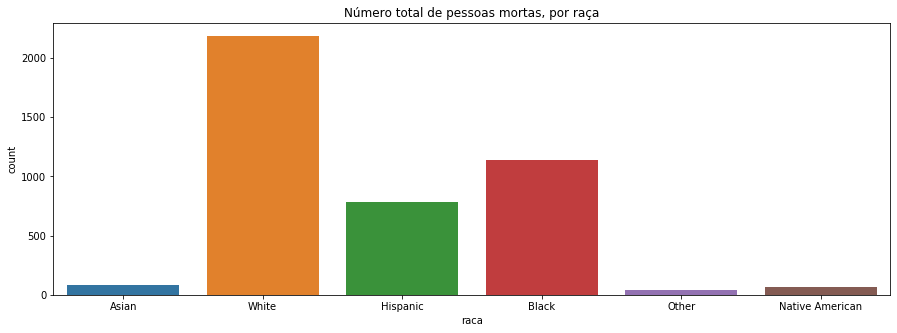

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=fatal_police_shootings,x="raca")
plt.title("Número total de pessoas mortas, por raça")

/home/matheus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1080x576 with 0 Axes>

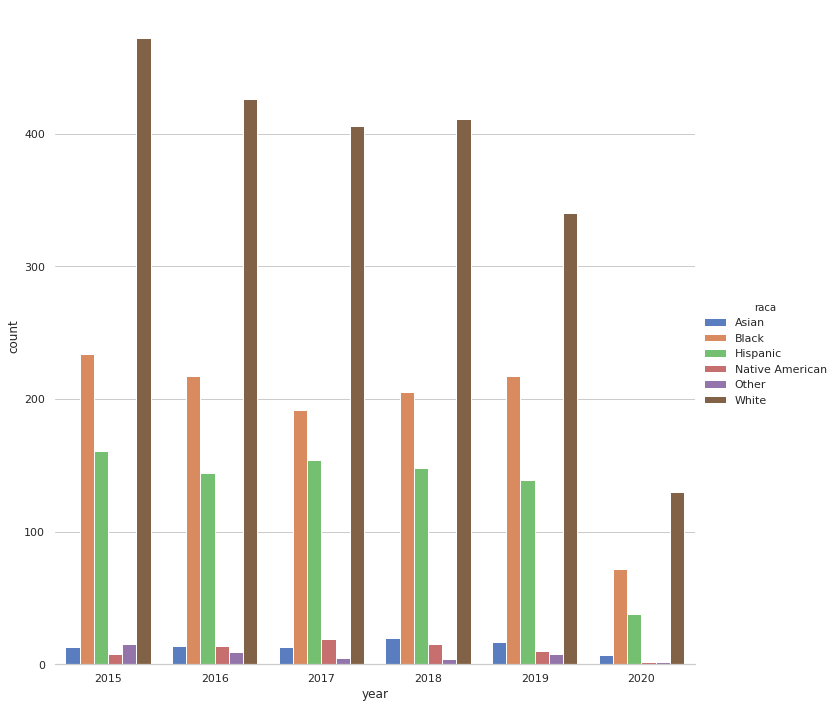

In [29]:
kill_by_year = fatal_police_shootings[['year','raca']]
kill_by_year['count'] = 1
kill_by_year = kill_by_year.groupby(['year', 'raca']).sum()
kill_by_year = kill_by_year.reset_index()
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
g = sns.catplot(x='year',y='count',hue='raca',data=kill_by_year, height=10, kind='bar', palette='muted')
g.despine(left=True)

In [30]:
data = [['Asian', 14674252.0],['White', 223553265.0],
        ['Hispanic', 50477594.0],['Black', 38929319.0],
        ['Native American', 2932248.0],['Other', 22579629.0]]
censu_populacional_us = pd.DataFrame(data=data,columns=['raca','populacao'])
censu_populacional_us.head()

,raca,populacao
0,Asian,14674252.0
1,White,223553265.0
2,Hispanic,50477594.0
3,Black,38929319.0
4,Native American,2932248.0


Text(0.5, 1.0, 'Número total de pessoas mortas, por gênero')

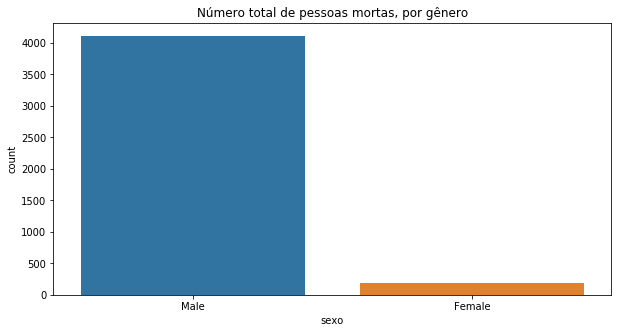

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=fatal_police_shootings,x="sexo")
plt.title("Número total de pessoas mortas, por gênero")

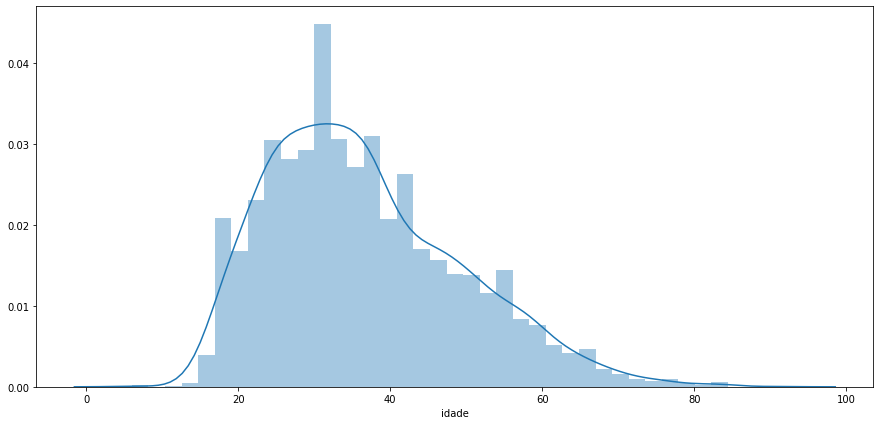

In [23]:
plt.figure(figsize=(15,7))
sns.distplot(fatal_police_shootings.idade)

/home/matheus/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


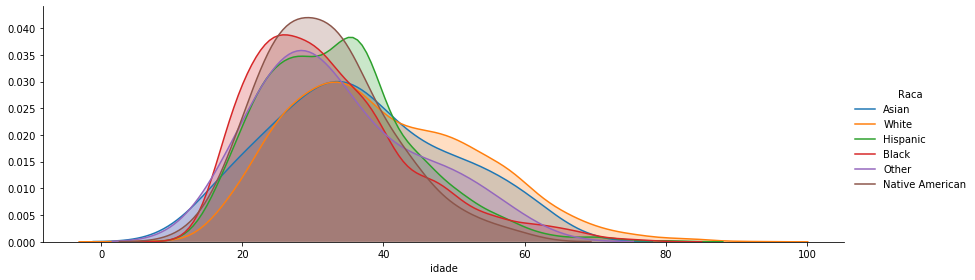

In [24]:
graphic = sns.FacetGrid(data=fatal_police_shootings,hue="raca",aspect=3,size=4)
graphic.map(sns.kdeplot,"idade",shade=True)
graphic.add_legend(title="Raca")

/home/matheus/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/matheus/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/matheus/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/matheus/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/matheus/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

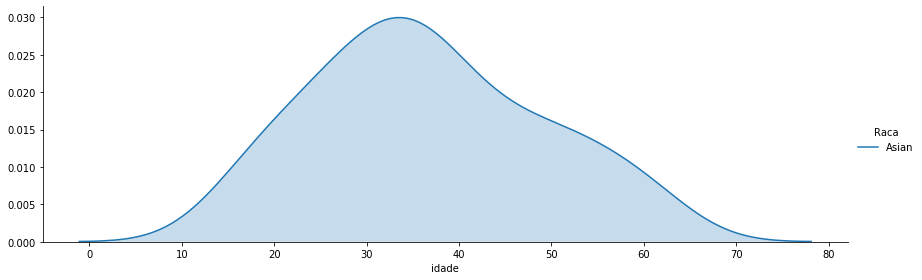

<Figure size 1080x576 with 0 Axes>

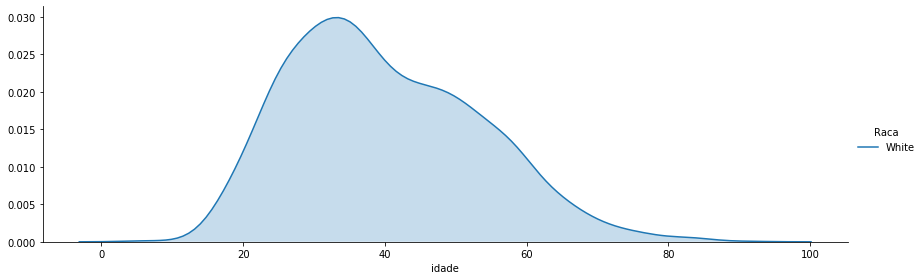

<Figure size 1080x576 with 0 Axes>

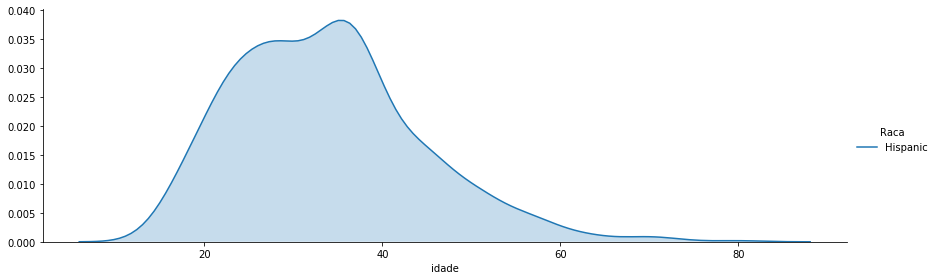

<Figure size 1080x576 with 0 Axes>

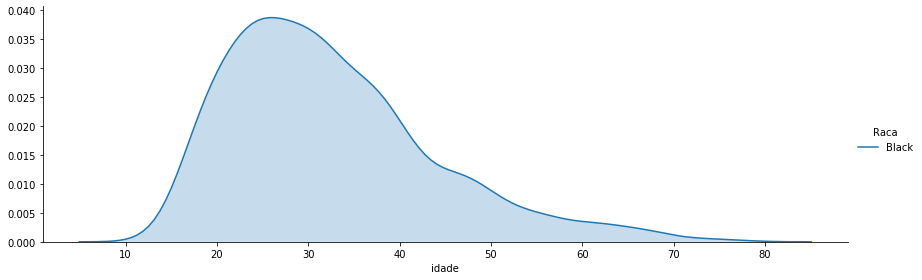

<Figure size 1080x576 with 0 Axes>

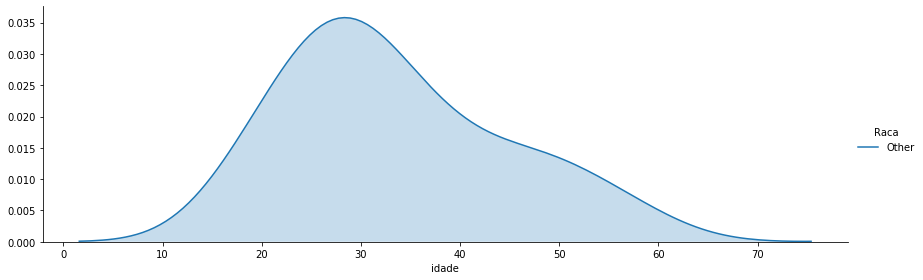

<Figure size 1080x576 with 0 Axes>

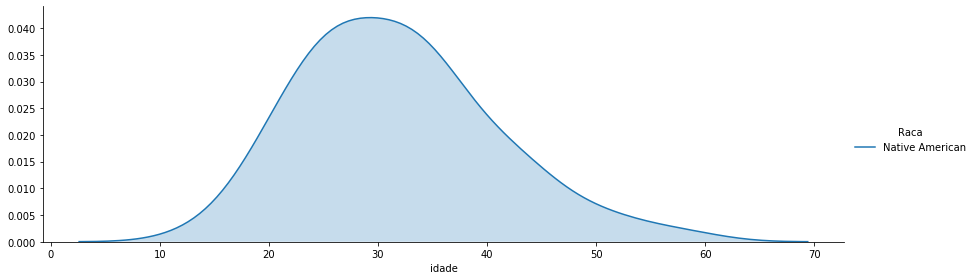

In [25]:
for etnia in fatal_police_shootings.raca.unique():
    df_etnia = fatal_police_shootings[fatal_police_shootings['raca']==etnia]
    plt.figure(figsize=(15,8))
    graphic = sns.FacetGrid(data=df_etnia,hue="raca",aspect=3,size=4)
    graphic.map(sns.kdeplot,"idade",shade=True)
    graphic.add_legend(title="Raca")

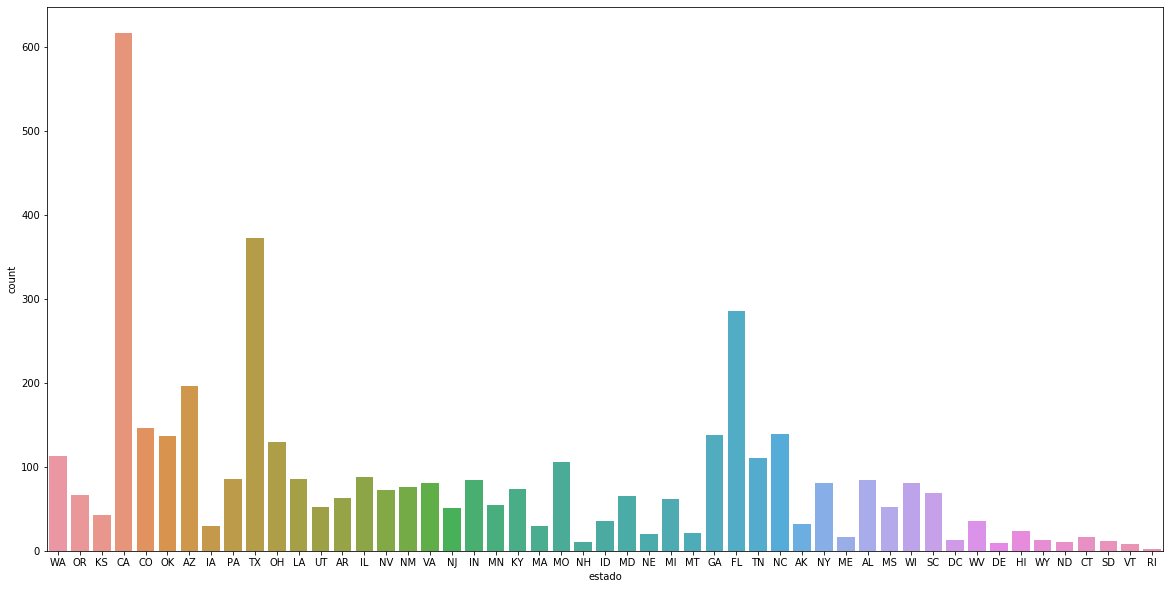

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data=fatal_police_shootings,x=fatal_police_shootings.estado)

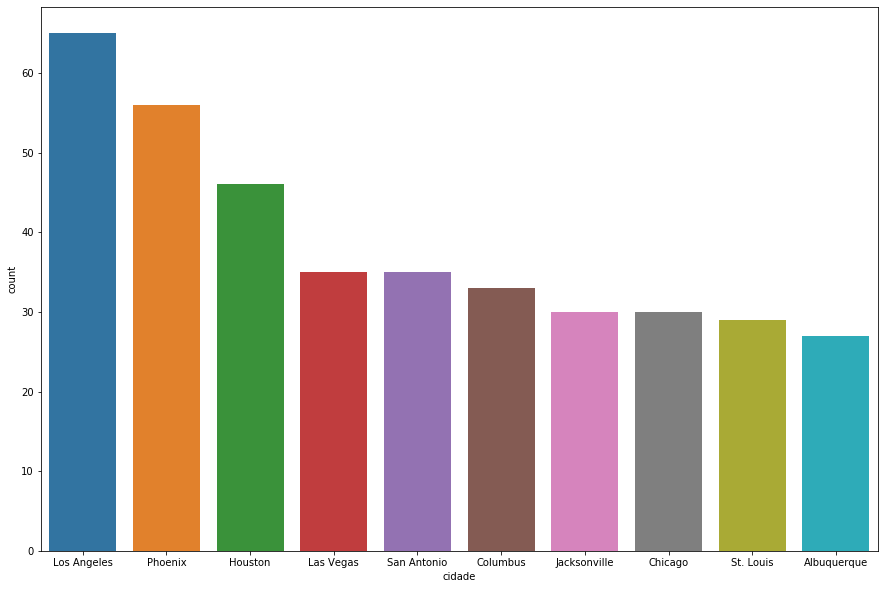

In [27]:
fatal_police_shootings_by_city = fatal_police_shootings.filter(['cidade'],axis=1)
fatal_police_shootings_by_city['count'] = 1
group_by_fatal_police = fatal_police_shootings_by_city.groupby('cidade',as_index=False,sort=False).sum()
group_by_fatal_police = group_by_fatal_police.sort_values("count",ascending=False)
group_by_fatal_police = group_by_fatal_police.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=group_by_fatal_police,x='cidade',y='count')